In [1]:
from applications.denoiser_environment import DenoiserEnvironment

In [2]:
import torch

In [3]:
PATH_BASE = "/home/amedvedev/projects/python/DenoisingCNN"
NAME_DATASET = "gcg19"
width, height = 80, 80
env = DenoiserEnvironment(name_model="model_18", name_dataset=NAME_DATASET, path_base=PATH_BASE)
env.device = torch.device("cuda:0")

In [16]:
from datageneration.generators import GenPolyDataset
from datageneration import paramsgens

generate_settings = [("train", 1), ("val", 0)]

for (data_category, count) in generate_settings:
    env.generate_data(NAME_DATASET, data_category, n=count, width=width, height=height,
                      cell_size=paramsgens.GenCellSizeInSet([1, 2]),
                      pct_noise=paramsgens.GenPctUniformNoiseRange(0.6, 0.7),
                      k0=paramsgens.GenK0InRange(min_val=-100, max_val=100),
                      csv=False, txt=True, png=True,
                      generator_class=GenPolyDataset,
                      )

# pct_noise=0.1, k0=55.0,

Generating dataset gcg18/train...
Progress: |██████████████████████████████| 100.0% Complete | 

Generating dataset gcg18/val...


In [5]:
import models
env.init_model(models.ImageAutoencoder)

/home/amedvedev/projects/python/DenoisingCNN/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amedvedev/projects/python/DenoisingCNN/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/amedvedev/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
68.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit,

In [21]:
import models
env.model = models.UnetAutoencoder.UNetAuto(1, 1, 1024).to(env.device)

In [19]:
env.model.eval()
x = torch.randn(1, 1, 64, 64, device=env.device)
print(env.model(x).size())

torch.Size([1, 1, 64, 64])


In [20]:
env.model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=1, out_channels=1, init_features=32, pretrained=False).to(env.device)

Using cache found in /home/amedvedev/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [21]:
env.load_model(model_type="pt")

In [13]:
from common.fstream import read_tensor, read_matrix, rescale_array
import numpy as np

def read_tensor2(path, rescale=True):
    if not rescale:
        return read_matrix(path)
    with open(path, "r", encoding="utf8") as file_matrix:
        matrix = rescale_array(np.array(list(
            map(lambda row: list(map(lambda el: float(el) * 1e7, row.split())), file_matrix.read().strip().split("\n")))))
    return matrix

env.load_data(width, height, batch_size=4, read_tensor_x=read_tensor2, read_tensor_y=read_tensor2)

In [5]:
from common.fstream import read_tensor, read_matrix
env.load_equal_data(width, height, batch_size=4, read_tensor_x=read_tensor, read_tensor_y=read_matrix)

In [24]:
scores_before, scores = env.score(show=True)


KeyboardInterrupt



In [22]:
env.train(32, step_saving=True, step_plotting=False,
          optimizer=torch.optim.Adam(env.model.parameters(), lr=0.1), criterion=torch.nn.MSELoss())

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 0.860196 	Validating Loss: 0.384892 	Time: 0.73 m

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 0.240370 	Validating Loss: 0.101901 	Time: 0.80 m
Model saved successfully at /home/amedvedev/projects/python/DenoisingCNN/assets/pt/model_18.pt.

Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 3 	Training Loss: 0.071989 	Validating Loss: 0.049397 	Time: 0.80 m
Model saved successfully at /home/amedvedev/projects/python/DenoisingCNN/assets/pt/model_18.pt.

Training progress: |██

KeyboardInterrupt: 

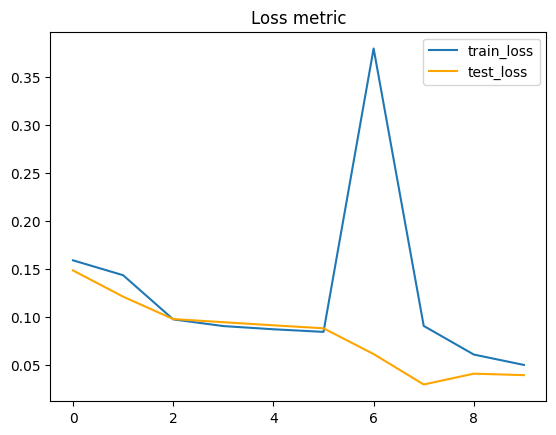

In [19]:
env.show_metrics(n_last=10)

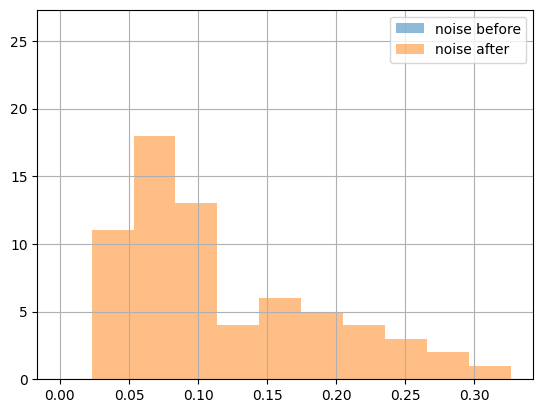

In [23]:
scores_before, scores = env.score(show=True)

In [10]:
scores

[0.10598796606063843,
 0.09550321102142334,
 0.0412076860666275,
 0.0681084394454956,
 0.03919201344251633,
 0.11202363669872284,
 0.04652826860547066,
 0.07570774853229523,
 0.056519992649555206,
 0.05550016835331917,
 0.029396390542387962,
 0.04971772059798241,
 0.03864748775959015,
 0.05036443471908569,
 0.03975125774741173,
 0.015326769091188908,
 0.03282622620463371,
 0.2769811153411865,
 0.03608689829707146,
 0.061307910829782486,
 0.019779082387685776,
 0.022536499425768852,
 0.04158725589513779,
 0.06181599572300911,
 0.021172676235437393,
 0.016202474012970924,
 0.08921074867248535,
 0.08264034241437912,
 0.10809331387281418,
 0.09691944718360901,
 0.1535346806049347,
 0.03445585072040558,
 0.12077365815639496,
 0.05171497166156769,
 0.044094622135162354,
 0.03846781700849533,
 0.032977450639009476,
 0.057193953543901443,
 0.05604591593146324,
 0.019436821341514587,
 0.03132792189717293,
 0.06493722647428513,
 0.12263622134923935,
 0.03170246630907059,
 0.03257378935813904,
 0

In [ ]:
env.save(pth=False, onnx=True)

In [ ]:
torch.save(env.model, "/home/amedvedev/fprojects/python/denoising/assets/pt/model.pt")

In [ ]:
env.test_on_dataset(include_train=False, include_test=True, cmap="jet")

Show example №15


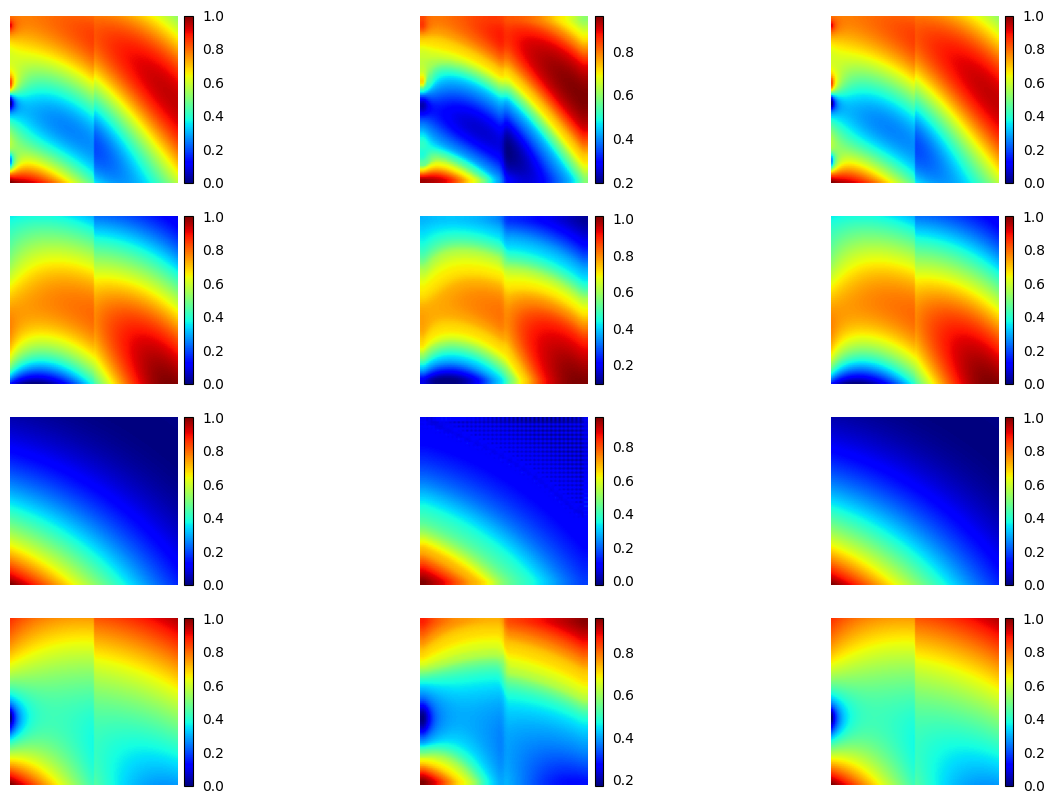

In [12]:
env.show_single(concrete=None, op_count=1, figsize=(15, 10), cmap="jet")

In [ ]:
import gc
gc.collect()


In [15]:

import torch
env.model.cpu()
del env.model

torch.cuda.empty_cache()